In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
INFILE = "C:\\Users\\ejl9900\\Desktop\\Data Science\\MSDS422\\Unit 01 (Week 1 & 2)\\Assignment\\HMEQ_Loss.csv"

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"


In [3]:
df = pd.read_csv( INFILE )
dt = df.dtypes
print( dt )

TARGET_BAD_FLAG      int64
TARGET_LOSS_AMT    float64
LOAN                 int64
MORTDUE            float64
VALUE              float64
REASON              object
JOB                 object
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
dtype: object


In [4]:
'''
CREATE OBJECT and NUMBER List
'''

objList = []
numList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )

In [5]:
print(" OBJECTS ")
print(" ------- ")
for i in objList :
    print( i )
print(" ------- ")

 OBJECTS 
 ------- 
REASON
JOB
 ------- 


In [6]:
print(" NUMBERS ")
print(" ------- ")
for i in numList :
    print( i )
print(" ------- ")

 NUMBERS 
 ------- 
LOAN
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC
 ------- 


In [7]:
'''
EXPLORE THE CATEGORICAL / OBJECT VARIABLES
'''


for i in objList :
    print(" Class = ", i )
    g = df.groupby( i )
    print( g[i].count() )
    x = g[ TARGET_F ].mean()
    print( "Loan Default Prob", x )
    print( " ................. ")
    x = g[ TARGET_A ].mean()
    print( "Loss Amount", x )
    print(" ===============\n\n\n ")

 Class =  REASON
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
Loan Default Prob REASON
DebtCon    0.189664
HomeImp    0.222472
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Loss Amount REASON
DebtCon    16005.163758
HomeImp     8388.090909
Name: TARGET_LOSS_AMT, dtype: float64


 
 Class =  JOB
JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64
Loan Default Prob JOB
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Loss Amount JOB
Mgr        14141.536313
Office     13475.304000
Other      11570.102888
ProfExe    14660.966981
Sales      16421.447368
Self       22232.362069
Name: TARGET_LOSS_AMT, dtype: float64


 


In [8]:
'''
CHECK FOR MISSING DATA
'''

for i in objList :
    print( i )
    print( df[i].unique() )
    g = df.groupby( i )
    print( g[i].count() )
    print( "MOST COMMON = ", df[i].mode()[0] )   
    print( "MISSING = ", df[i].isna().sum() )
    print( "\n\n")


REASON
['HomeImp' nan 'DebtCon']
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
MOST COMMON =  DebtCon
MISSING =  252



JOB
['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64
MOST COMMON =  Other
MISSING =  279





In [9]:
"""
FOR OBJECTS - FILL IN MISSING WITH THE MODE
"""
for i in objList :
    if df[i].isna().sum() == 0 : continue
    print( i ) 
    print("HAS MISSING")
    NAME = "IMP_"+i
    print( NAME ) 
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna(df[NAME].mode()[0] )
    print( "variable",i," has this many missing", df[i].isna().sum() )
    print( "variable",NAME," has this many missing", df[NAME].isna().sum() )
    g = df.groupby( NAME )
    print( g[NAME].count() )
    print( "\n\n")
    df = df.drop( i, axis=1 )

REASON
HAS MISSING
IMP_REASON
variable REASON  has this many missing 252
variable IMP_REASON  has this many missing 0
IMP_REASON
DebtCon    4180
HomeImp    1780
Name: IMP_REASON, dtype: int64



JOB
HAS MISSING
IMP_JOB
variable JOB  has this many missing 279
variable IMP_JOB  has this many missing 0
IMP_JOB
Mgr         767
Office      948
Other      2667
ProfExe    1276
Sales       109
Self        193
Name: IMP_JOB, dtype: int64





In [10]:
dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )

In [11]:
print(" OBJECTS ")
print(" ------- ")
for i in objList :
    print( i )
print(" ------- ")


 OBJECTS 
 ------- 
IMP_REASON
IMP_JOB
 ------- 


In [12]:
'''
EXPLORE OBJECT VARIABLES ONCE AGAIN AFTER FILLING IN MISSING WITH MODE
'''

for i in objList :
    print(" Class = ", i )
    print( df[i].unique() )
    g = df.groupby( i )
    x = g[ TARGET_F ].mean()
    print( "Loan Default Prob", x )
    print( " ................. ")
    x = g[ TARGET_A ].mean()
    x = g[ TARGET_A ].median()
    print( "Loss Amount", x )
    print(" ===============\n\n\n ")

 Class =  IMP_REASON
['HomeImp' 'DebtCon']
Loan Default Prob IMP_REASON
DebtCon    0.189713
HomeImp    0.222472
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Loss Amount IMP_REASON
DebtCon    13630.0
HomeImp     5784.5
Name: TARGET_LOSS_AMT, dtype: float64


 
 Class =  IMP_JOB
['Other' 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
Loan Default Prob IMP_JOB
Mgr        0.233377
Office     0.131857
Other      0.216348
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Loss Amount IMP_JOB
Mgr        12779.0
Office     10208.0
Other       9559.0
ProfExe    12438.5
Sales      15614.0
Self       18484.5
Name: TARGET_LOSS_AMT, dtype: float64


 


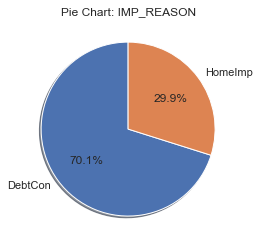

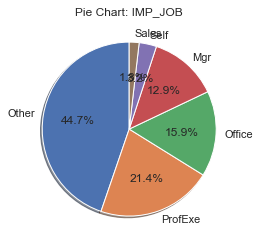

In [13]:
"""
CREATE PIE CHARTS FOR OBJECTS
"""

for i in objList :
    x = df[ i ].value_counts(dropna=False)
    #print( x )
    theLabels = x.axes[0].tolist()
    #print( theLabels )
    theSlices = list(x)
    #print( theSlices ) 
    plt.pie( theSlices,
             labels=theLabels,
             startangle = 90,
             shadow=True,
             autopct="%1.1f%%")
    plt.title("Pie Chart: " + i)
    plt.show()

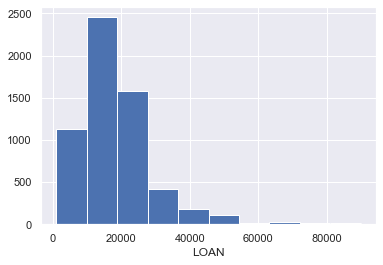

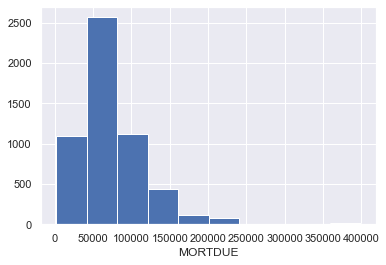

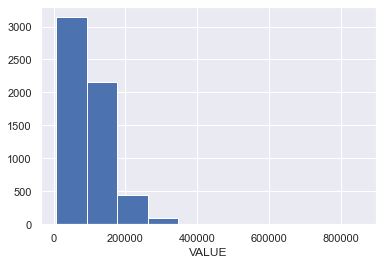

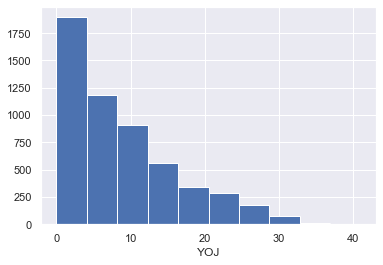

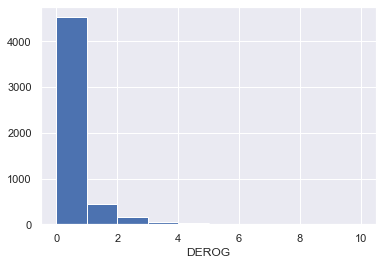

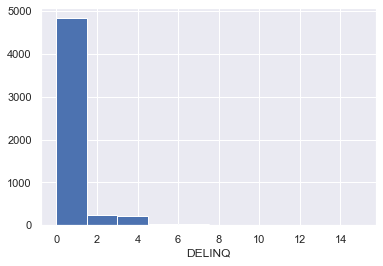

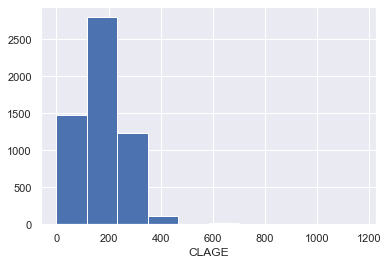

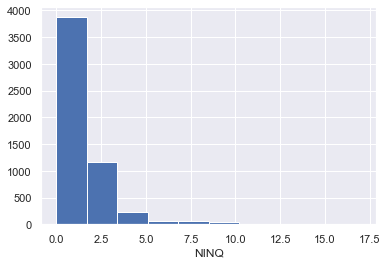

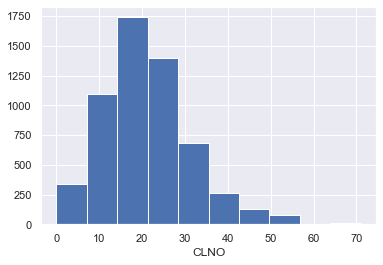

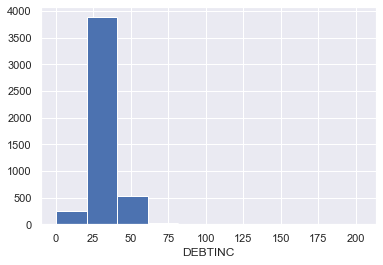

In [14]:
"""
CREATE HISTOGRAMS FOR NUMBERS
"""

for i in numList :
    plt.hist( df[ i ] )
    plt.xlabel( i )
    plt.show()

In [15]:
'''
FOR NUMBER VARIABLES - IMPUTE USING THE MEDIAN
'''

for i in numList :
    if df[i].isna().sum() == 0 : continue
    FLAG = "M_" + i
    IMP = "IMP_" + i
    #print(i)
    print( df[i].isna().sum() )
    print( FLAG )
    print( IMP )
    print(" ------- ")
    df[ FLAG ] = df[i].isna() + 0
    df[ IMP ] = df[ i ]
    df.loc[ df[IMP].isna(), IMP ] = df[i].median()
    df = df.drop( i, axis=1 )


518
M_MORTDUE
IMP_MORTDUE
 ------- 
112
M_VALUE
IMP_VALUE
 ------- 
515
M_YOJ
IMP_YOJ
 ------- 
708
M_DEROG
IMP_DEROG
 ------- 
580
M_DELINQ
IMP_DELINQ
 ------- 
308
M_CLAGE
IMP_CLAGE
 ------- 
510
M_NINQ
IMP_NINQ
 ------- 
222
M_CLNO
IMP_CLNO
 ------- 
1267
M_DEBTINC
IMP_DEBTINC
 ------- 


In [16]:
"""
FILL IN MISSING WITH THE CATEGORY "MISSING".  ALSO CREATE IMP_ VARIABLES
"""
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby( NAME )
    df = df.drop( i, axis=1 )


In [17]:
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1,1,1,1,0
TARGET_LOSS_AMT,641,1109,767,1425,NaN
LOAN,1100,1300,1500,1500,1700
IMP_REASON,HomeImp,HomeImp,HomeImp,DebtCon,HomeImp
IMP_JOB,Other,Other,Other,Other,Office
M_MORTDUE,0,0,0,1,0
IMP_MORTDUE,25860,70053,13500,65019,97800
M_VALUE,0,0,0,1,0
IMP_VALUE,39025,68400,16700,89235.5,112000
M_YOJ,0,0,0,1,0


In [18]:
dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )

In [19]:
"""
CHECK FOR RELATIONSHIPS BETWEEN JOB AND LOAN AMOUNT
"""

g = df.groupby("IMP_JOB")
i = "LOAN"
print( g[i].median() )

IMP_JOB
Mgr        18100
Office     16200
Other      15200
ProfExe    17300
Sales      14300
Self       24000
Name: LOAN, dtype: int64


In [20]:
"""
CHECK FOR RELATIONSHIPS BETWEEN JOB AND VALUE OF HOUSE
"""

g = df.groupby("IMP_JOB")
i = "IMP_VALUE"
print( g[i].median() )

IMP_JOB
Mgr         98561.0
Office      89235.5
Other       77826.0
ProfExe    109443.0
Sales       84579.0
Self       127300.0
Name: IMP_VALUE, dtype: float64


In [21]:
"""
CHECK FOR RELATIONSHIPS BETWEEN JOB AND MORTGAGE DUE
"""

g = df.groupby("IMP_JOB")
i = "IMP_MORTDUE"
print( g[i].median() )

IMP_JOB
Mgr        75142.0
Office     64712.0
Other      60573.0
ProfExe    82018.0
Sales      70546.0
Self       84333.0
Name: IMP_MORTDUE, dtype: float64


In [22]:
"""
CHECK FOR RELATIONSHIPS BETWEEN JOB AND MORTGAGE DUE
"""

g = df.groupby("TARGET_BAD_FLAG")
i = "IMP_MORTDUE"
print( g[i].median() )

TARGET_BAD_FLAG
0    65019.0
1    63800.0
Name: IMP_MORTDUE, dtype: float64


In [23]:
'''
USE ONE HOT ENCODING TO CONVERT STRING OBJECT VALUES TO NUMERICAL VALUES, THEN DROP OBJECT VARIABLES
'''

for i in objList :
    thePrefix = "z_" + i
    y = pd.get_dummies( df[i], prefix=thePrefix, drop_first=True )   
    y = pd.get_dummies( df[i], prefix=thePrefix )   
    df = pd.concat( [df, y], axis=1 )
    df = df.drop( i, axis=1 )

['IMP_REASON', 'IMP_JOB']

In [24]:
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.000000,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,NaN
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
M_MORTDUE,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_MORTDUE,25860.000000,70053.000000,13500.000000,65019.000000,97800.000000
M_VALUE,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_VALUE,39025.000000,68400.000000,16700.000000,89235.500000,112000.000000
M_YOJ,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_YOJ,10.500000,7.000000,4.000000,7.000000,3.000000
M_DEROG,0.000000,0.000000,0.000000,1.000000,0.000000


In [24]:
'''
GET SUMMARY STATS FOR EACH VARIABLE
'''

df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET_BAD_FLAG,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
TARGET_LOSS_AMT,1189.0,13414.576955,10839.455965,224.000000,5639.000000,11003.000000,17634.000000,78987.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
M_MORTDUE,5960.0,0.086913,0.281731,0.000000,0.000000,0.000000,0.000000,1.000000
IMP_MORTDUE,5960.0,73001.041812,42552.726779,2063.000000,48139.000000,65019.000000,88200.250000,399550.000000
M_VALUE,5960.0,0.018792,0.135801,0.000000,0.000000,0.000000,0.000000,1.000000
IMP_VALUE,5960.0,101540.387423,56869.436682,8000.000000,66489.500000,89235.500000,119004.750000,855909.000000
M_YOJ,5960.0,0.086409,0.280991,0.000000,0.000000,0.000000,0.000000,1.000000
IMP_YOJ,5960.0,8.756166,7.259424,0.000000,3.000000,7.000000,12.000000,41.000000
M_DEROG,5960.0,0.118792,0.323571,0.000000,0.000000,0.000000,0.000000,1.000000
